In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:

# image = cv2.imread('/home/viki/Pictures/example.jpg')
# # add red line in the middle
# cv2.line(image, (image.shape[1]//2 - 150, image.shape[0]//2),
#          (image.shape[1]//2 + 150, image.shape[0]//2), (0, 0, 255), 10)

# imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(imgray, 127, 255, 0)
# im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# print(im2)
# print(contours)

In [3]:

    
def image2twist(image):
    #assume line speicifc color
    line_color = [255, 0, 0]  # red line ig
    # assume im in the middle and on the line
    midpoint = (image.width // 2, image.height // 2)
    
    
    

[Point2D(2/3, -4*sqrt(2)/3), Point2D(2/3, 4*sqrt(2)/3)]


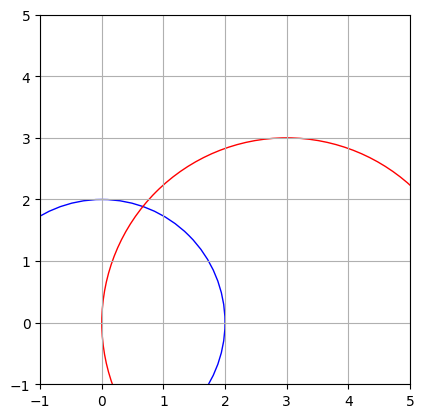

Point2D(0.666666666666667, -1.88561808316413)


In [ ]:
from sympy import geometry
import matplotlib.pyplot as plt
qr_coords = {
    'qr1': (0, 0),
    'qr2': (3, 0),
    'qr3': (2, 3.464),  # coordinates of QR codes in meters
    'qr4': (5, 5)
}


def two_point_triangl( qrid, distance):
    coords1 = qr_coords.get(qrid[0])
    coords2 = qr_coords.get(qrid[1])
    
    qr1 = geometry.Point2D(coords1[0], coords1[1])
    qr2 = geometry.Point2D(coords2[0], coords2[1])
    
    intersection = geometry.Circle(qr1, distance[0]).intersection(geometry.Circle(qr2, distance[1]))
    print(intersection)
    return intersection
    
inter = two_point_triangl( ['qr1', 'qr2'], [2, 3])
    
# picture of the cicrcles
fig, ax = plt.subplots()
circle1 = plt.Circle((qr_coords['qr1'][0], qr_coords['qr1'][1]), 2, color='b', fill=False)
circle2 = plt.Circle((qr_coords['qr2'][0], qr_coords['qr2'][1]), 3, color='r', fill=False)
ax.add_artist(circle1)
ax.add_artist(circle2)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

print(inter[0].evalf())

In [5]:
def multipoint_triangl( qrids, distances):
        # solve by lstsq by susvstracting
        # qrids = np.array(qrids, float)
        distances  = np.array(distances,  float)

        x1, y1 = qr_coords.get(qrids[0])
        r1 = distances[0]
        A = []
        b = []

        for qrid, ri in zip(qrids[1:], distances[1:]):
            xi, yi = qr_coords.get(qrid)
            A.append([2*(xi - x1), 2*(yi - y1)])
            b.append(r1**2 - ri**2 + xi**2 - x1**2 + yi**2 - y1**2)

        A = np.array(A)
        b = np.array(b)

        pos, *_ = np.linalg.lstsq(A, b, rcond=None)  # least-squares solution
        return pos  # (x, y)

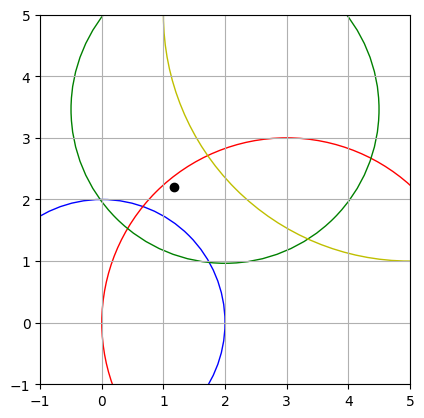

[1.16964505 2.20191632]


In [6]:
inter = multipoint_triangl(['qr1', 'qr2', 'qr3', 'qr4'], [2, 3, 2.5, 4])

fig, ax = plt.subplots()
circle1 = plt.Circle((qr_coords['qr1'][0], qr_coords['qr1'][1]), 2, color='b', fill=False)
circle2 = plt.Circle((qr_coords['qr2'][0], qr_coords['qr2'][1]), 3, color='r', fill=False)
circle3 = plt.Circle((qr_coords['qr3'][0], qr_coords['qr3'][1]), 2.5, color='g', fill=False)
circle4 = plt.Circle((qr_coords['qr4'][0], qr_coords['qr4'][1]), 4, color='y', fill=False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
plt.scatter(inter[0], inter[1], color='black')  # plot the triangulated point
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()
print(inter)